In [1]:
import sympy as smp
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [2]:
class FileSystemManager:
    def __init__(self):
        pass

    def open_file(self, text, filepath, flag):
        """
        Opens a file in read, write, or append mode.
        
        :param text: Text to write to the file if flag is 'w' or 'a'
        :param filepath: Path of the file to open
        :param flag: 'r' to read, 'w' to write, 'a' to append
        :return: File content if reading, None if writing or appending
        """
        try:
            if flag == 'r':
                with open(filepath, 'r') as f:
                    data = f.read()
                    return data  # return instead of print
            elif flag == 'w':
                with open(filepath, 'w') as f:
                    f.write(text)
            elif flag == 'a':
                with open(filepath, 'a') as f:
                    f.write(text)
            else:
                raise ValueError("Unsupported flag. Use 'r' for read, 'w' for write, or 'a' for append.")
        except FileNotFoundError:
            print(f"Error: File {filepath} not found.")
        except IOError as e:
            print(f"Error accessing file {filepath}: {e}")

In [3]:
class MagmaCalculator:
    """
    A class to interact with the Magma Calculator webpage and submit code for evaluation.
    
    Attributes:
    ----------
    output_file : str
        The name of the file where the output from the Magma Calculator will be saved.
    driver : webdriver.Chrome
        A Chrome web driver instance to automate browser interaction.
    url : str
        The URL of the Magma Calculator page.
    
    Methods:
    -------
    submit_code(code):
        Submits the given Magma code to the calculator and saves the result to a file.
    
    close():
        Closes the browser session.
    """
    
    def __init__(self, output_file="MagmaCalcResult"):
        """
        Initializes the MagmaCalculator with the given output file name.
        
        Parameters:
        ----------
        output_file : str, optional
            The name of the file where the result will be saved (default is "output.txt").
        """
        self.url = "http://magma.maths.usyd.edu.au/calc/"
        self.output_file = output_file
        self.file_manager = FileSystemManager()

    def submit_code(self, code):
        """
        Submits the given code to the Magma Calculator and saves the result to the output file.
        
        Parameters:
        ----------
        code : str
            The Magma code to be submitted for evaluation.
        
        Actions:
        -------
        - Opens the Magma Calculator webpage.
        - Finds the input box and enters the code.
        - Clicks the submit button.
        - Waits for the result to load.
        - Retrieves the result and writes it to the specified output file.
        """
        driver = webdriver.Chrome()
        try:
            driver.get(self.url)
            
            input_box = driver.find_element(By.ID, "input")
            input_box.clear()
            input_box.send_keys(code)
            
            submit_button = driver.find_element(By.XPATH, "//input[@value='Submit']")
            submit_button.click()
            
            time.sleep(5)
            
            result_element = driver.find_element(By.ID, "result")
            result_text = result_element.get_attribute('value')
            
            self.file_manager.open_file(code + '\n' + result_text, self.output_file, 'a')
        finally:
            driver.quit()

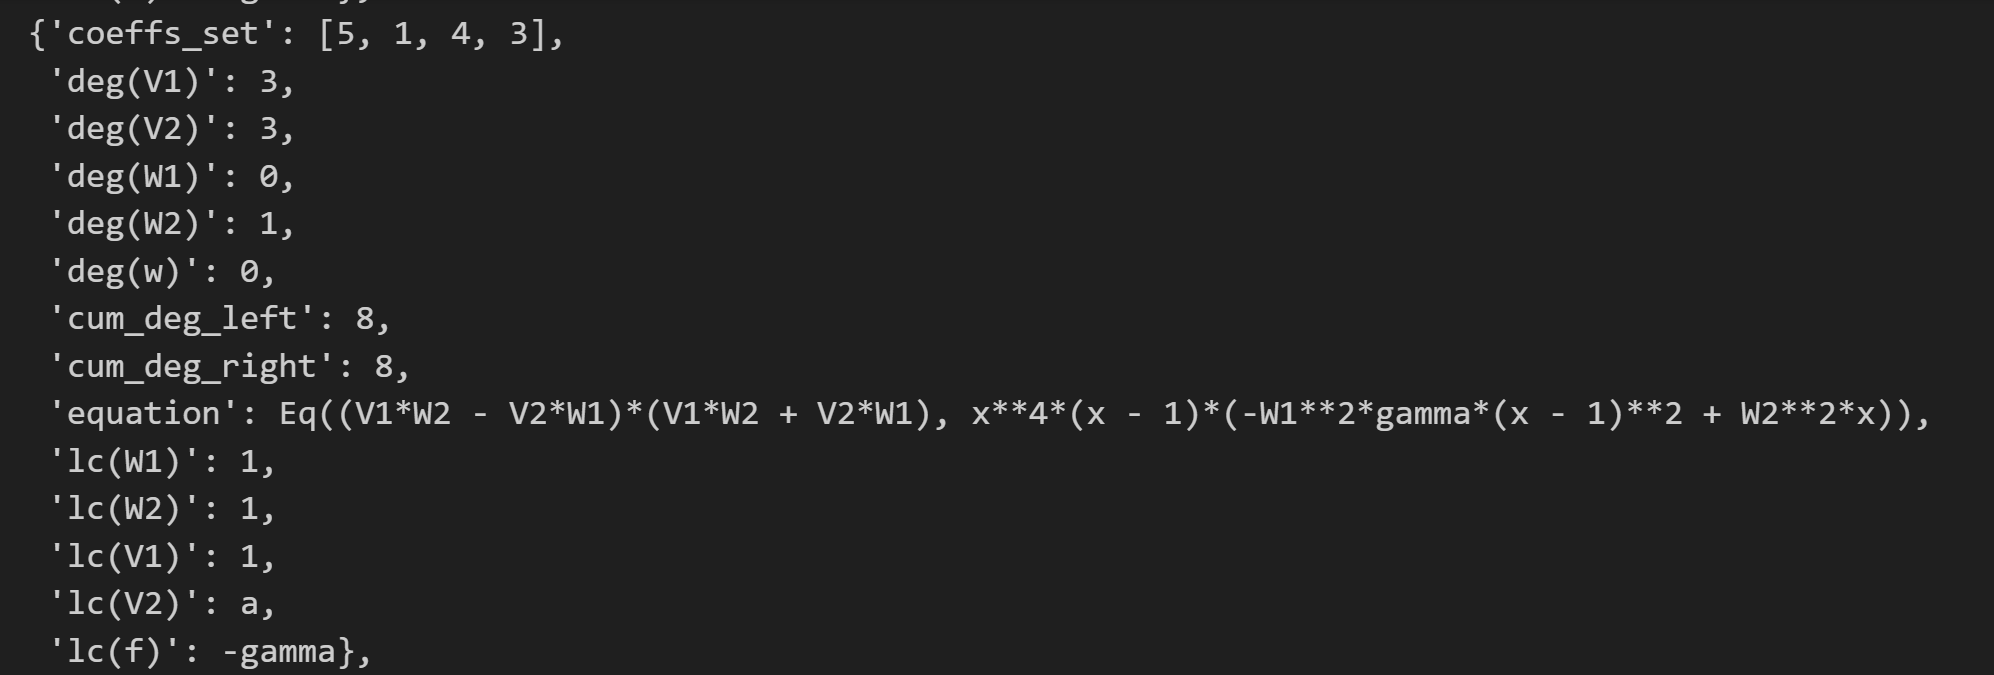

In [4]:
x, x0, w, gamma = smp.symbols('x x0 w gamma')

In [5]:
eq_1 = smp.Poly(w * x**4, x)
eq_2 = smp.Poly((1 / w) * ((x - 1)*(x - x0)**2 * x - gamma * (x - 1)**3), x)

In [6]:
eq_1

Poly(w*x**4, x, domain='ZZ[w]')

In [7]:
eq_2

Poly(1/w*x**4 + (-gamma - 2*x0 - 1)/w*x**3 + (3*gamma + x0**2 + 2*x0)/w*x**2 + (-3*gamma - x0**2)/w*x + gamma/w, x, domain='ZZ(x0,w,gamma)')

In [8]:
V1_m = (eq_1 + eq_2)/2
V2 = (-eq_1 + eq_2)/2

In [9]:
V1_m

gamma/(2*w) + x**4*(w**2 + 1)/(2*w) + x**3*(-gamma - 2*x0 - 1)/(2*w) + x**2*(3*gamma + x0**2 + 2*x0)/(2*w) + x*(-3*gamma - x0**2)/(2*w)

In [10]:
V2

gamma/(2*w) + x**4*(1 - w**2)/(2*w) + x**3*(-gamma - 2*x0 - 1)/(2*w) + x**2*(3*gamma + x0**2 + 2*x0)/(2*w) + x*(-3*gamma - x0**2)/(2*w)

In [11]:
solution_w = smp.solve(V1_m.subs(x, x0), w)
solution = solution_w[0]

In [12]:
print(solution)

-sqrt(gamma*(x0 - 1)**3)/x0**2


In [13]:
V_q = (V1_m * V1_m)

In [14]:
V_q

(gamma/(2*w) + x**4*(w**2 + 1)/(2*w) + x**3*(-gamma - 2*x0 - 1)/(2*w) + x**2*(3*gamma + x0**2 + 2*x0)/(2*w) + x*(-3*gamma - x0**2)/(2*w))**2

In [15]:
V_q = V_q.simplify().subs(w, solution).simplify()

In [16]:
V_q

(x**4*(gamma*(x0 - 1)**3 + x0**4) + x0**4*(gamma - x**3*(gamma + 2*x0 + 1) + x**2*(3*gamma + x0**2 + 2*x0) - x*(3*gamma + x0**2)))**2/(4*gamma*x0**4*(x0 - 1)**3)

In [17]:
p1 = smp.Poly((x-x0)**2,x)

quotient, remainder = smp.div(V_q, p1)

In [18]:
V1 = quotient

In [19]:
V1.simplify()

Poly(x**6*x0**8*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4)) + 2*x**6*x0**7*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma + x**6*x0**6*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma**2 - 6*x**6*x0**6*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma - 6*x**6*x0**5*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma**2 + 6*x**6*x0**5*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma + 15*x**6*x0**4*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma**2 - 2*x**6*x0**4*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma - 20*x**6*x0**3*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma**2 + 15*x**6*x0**2*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4))*gamma**2 - 6*x**6*x0*(1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4

In [20]:
remainder

Poly(0, x, x0, 1/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4), gamma, domain='ZZ')

In [21]:
f = smp.Poly(V1 - x**5 * (x - 1), x)

In [22]:
f

Poly((gamma**2*x0**6 - 6*gamma**2*x0**5 + 15*gamma**2*x0**4 - 20*gamma**2*x0**3 + 15*gamma**2*x0**2 - 6*gamma**2*x0 + gamma**2 - 2*gamma*x0**7 + 6*gamma*x0**6 - 6*gamma*x0**5 + 2*gamma*x0**4 + x0**8)/(4*gamma*x0**7 - 12*gamma*x0**6 + 12*gamma*x0**5 - 4*gamma*x0**4)*x**6 + (-3*gamma**2*x0**5 + 12*gamma**2*x0**4 - 19*gamma**2*x0**3 + 15*gamma**2*x0**2 - 6*gamma**2*x0 + gamma**2 - gamma*x0**7 + gamma*x0**6 - 3*gamma*x0**5 + 3*gamma*x0**4 - gamma*x0**3 - x0**8 - x0**7)/(2*gamma*x0**6 - 6*gamma*x0**5 + 6*gamma*x0**4 - 2*gamma*x0**3)*x**5 + (15*gamma**2*x0**4 - 38*gamma**2*x0**3 + 39*gamma**2*x0**2 - 18*gamma**2*x0 + 3*gamma**2 + 8*gamma*x0**6 + x0**8 + 4*x0**7 + x0**6)/(4*gamma*x0**5 - 12*gamma*x0**4 + 12*gamma*x0**3 - 4*gamma*x0**2)*x**4 + (-10*gamma**2*x0**3 + 15*gamma**2*x0**2 - 9*gamma**2*x0 + 2*gamma**2 - 6*gamma*x0**5 - x0**7 - x0**6)/(2*gamma*x0**4 - 6*gamma*x0**3 + 6*gamma*x0**2 - 2*gamma*x0)*x**3 + (15*gamma**2*x0**2 - 12*gamma**2*x0 + 3*gamma**2 + 8*gamma*x0**4 + x0**6)/(4*gamma*x

In [23]:
coeffs = f.all_coeffs()

In [24]:
print(coeffs[1])

(-3*gamma**2*x0**5 + 12*gamma**2*x0**4 - 19*gamma**2*x0**3 + 15*gamma**2*x0**2 - 6*gamma**2*x0 + gamma**2 - gamma*x0**7 + gamma*x0**6 - 3*gamma*x0**5 + 3*gamma*x0**4 - gamma*x0**3 - x0**8 - x0**7)/(2*gamma*x0**6 - 6*gamma*x0**5 + 6*gamma*x0**4 - 2*gamma*x0**3)


In [25]:
eq1 = smp.Eq(coeffs[0], 0)
eq2 = smp.Eq(coeffs[1], -gamma)

# Solve the system of equations for w
solution_gamma = smp.solve([eq1, eq2], gamma)
gamma_solution = solution_gamma[0][0]
gamma_solution

x0**4/(x0 - 1)**3

In [26]:
f = f.subs(gamma, gamma_solution).simplify()

In [27]:
print(f)

(-4*x**5*x0**7 + 12*x**5*x0**6 - 12*x**5*x0**5 + 4*x**5*x0**4 + x**4*x0**8 + 6*x**4*x0**7 - 17*x**4*x0**6 + 20*x**4*x0**5 - 19*x**4*x0**4 + 16*x**4*x0**3 - 5*x**4*x0**2 - 2*x**4*x0 + x**4 - 2*x**3*x0**8 - 2*x**3*x0**7 - 2*x**3*x0**6 + 4*x**3*x0**5 + 4*x**3*x0**4 - 14*x**3*x0**3 + 10*x**3*x0**2 - 2*x**3*x0 + x**2*x0**8 + 2*x**2*x0**7 + 6*x**2*x0**6 - 8*x**2*x0**5 + 10*x**2*x0**4 - 6*x**2*x0**3 + x**2*x0**2 - 2*x*x0**7 - 4*x*x0**5 + 2*x*x0**4 + x0**6)/(4*(x0**6 - 6*x0**5 + 15*x0**4 - 20*x0**3 + 15*x0**2 - 6*x0 + 1))


In [28]:
def factor_coeffs(f, val):
    return sum(smp.factor(coeff)*val**i for i, coeff in enumerate(reversed(smp.Poly(f, val).all_coeffs())))

In [29]:
f_main = factor_coeffs(f, x)
f

(-4*x**5*x0**7 + 12*x**5*x0**6 - 12*x**5*x0**5 + 4*x**5*x0**4 + x**4*x0**8 + 6*x**4*x0**7 - 17*x**4*x0**6 + 20*x**4*x0**5 - 19*x**4*x0**4 + 16*x**4*x0**3 - 5*x**4*x0**2 - 2*x**4*x0 + x**4 - 2*x**3*x0**8 - 2*x**3*x0**7 - 2*x**3*x0**6 + 4*x**3*x0**5 + 4*x**3*x0**4 - 14*x**3*x0**3 + 10*x**3*x0**2 - 2*x**3*x0 + x**2*x0**8 + 2*x**2*x0**7 + 6*x**2*x0**6 - 8*x**2*x0**5 + 10*x**2*x0**4 - 6*x**2*x0**3 + x**2*x0**2 - 2*x*x0**7 - 4*x*x0**5 + 2*x*x0**4 + x0**6)/(4*(x0**6 - 6*x0**5 + 15*x0**4 - 20*x0**3 + 15*x0**2 - 6*x0 + 1))

In [30]:
f_main.as_expr()

-x**5*x0**4/(x0 - 1)**3 + x**4*(x0**8 + 6*x0**7 - 17*x0**6 + 20*x0**5 - 19*x0**4 + 16*x0**3 - 5*x0**2 - 2*x0 + 1)/(4*(x0 - 1)**6) - x**3*x0*(x0**2 + x0 - 1)*(x0**5 + 2*x0**3 - 4*x0**2 + 4*x0 - 1)/(2*(x0 - 1)**6) + x**2*x0**2*(x0**6 + 2*x0**5 + 6*x0**4 - 8*x0**3 + 10*x0**2 - 6*x0 + 1)/(4*(x0 - 1)**6) - x*x0**4*(x0**3 + 2*x0 - 1)/(2*(x0 - 1)**6) + x0**6/(4*(x0 - 1)**6)

In [31]:
calc = MagmaCalculator()

In [32]:
def check_order(equation):
    """Function that helps to check an order of possible torison points of given function"""
    code = f"""
    P<x> := PolynomialRing(Rationals());
    C1 := HyperellipticCurve({equation});
    J1 := Jacobian(C1);
    TorsionSubgroup(J1);
    ClebschInvariants(C1);
    IgusaClebschInvariants(C1);
    IgusaInvariants(C1);"""
    calc.submit_code(code)

In [33]:
def get_magma_expr(f):
    content, primitive_poly = f.as_content_primitive() 
    integer_poly = primitive_poly * content.denominator  
    integer_poly = smp.Poly(integer_poly, x)
    magma_expr = str(integer_poly.as_expr()).replace('**', '^')
    return magma_expr

In [34]:
def curve_search(rang):
    for value in range(rang[0],rang[1]):
        f = f_main.subs(x0,value)
        magma_expr = get_magma_expr(f)
        check_order(magma_expr)

In [35]:
curve_search([10,20])

KeyboardInterrupt: 

In [36]:
print(smp.latex(f.as_expr()))

\frac{- 4 x^{5} x_{0}^{7} + 12 x^{5} x_{0}^{6} - 12 x^{5} x_{0}^{5} + 4 x^{5} x_{0}^{4} + x^{4} x_{0}^{8} + 6 x^{4} x_{0}^{7} - 17 x^{4} x_{0}^{6} + 20 x^{4} x_{0}^{5} - 19 x^{4} x_{0}^{4} + 16 x^{4} x_{0}^{3} - 5 x^{4} x_{0}^{2} - 2 x^{4} x_{0} + x^{4} - 2 x^{3} x_{0}^{8} - 2 x^{3} x_{0}^{7} - 2 x^{3} x_{0}^{6} + 4 x^{3} x_{0}^{5} + 4 x^{3} x_{0}^{4} - 14 x^{3} x_{0}^{3} + 10 x^{3} x_{0}^{2} - 2 x^{3} x_{0} + x^{2} x_{0}^{8} + 2 x^{2} x_{0}^{7} + 6 x^{2} x_{0}^{6} - 8 x^{2} x_{0}^{5} + 10 x^{2} x_{0}^{4} - 6 x^{2} x_{0}^{3} + x^{2} x_{0}^{2} - 2 x x_{0}^{7} - 4 x x_{0}^{5} + 2 x x_{0}^{4} + x_{0}^{6}}{4 \left(x_{0}^{6} - 6 x_{0}^{5} + 15 x_{0}^{4} - 20 x_{0}^{3} + 15 x_{0}^{2} - 6 x_{0} + 1\right)}
